In [12]:
import cv2

In [3]:
from selenium import webdriver

def save_image():
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get('http://irs.thsrc.com.tw/IMINT/')

    driver.save_screenshot('test.png')
    element = driver.find_element_by_id('BookingS1Form_homeCaptcha_passCode')
    left = element.location['x']
    right = element.location['x'] + element.size['width']
    top = element.location['y'] 
    bottom = element.location['y'] + element.size['height']
    driver.quit()

    from PIL import Image

    img = Image.open('test.png')

    img = img.crop((left, top, right, bottom))
    img.save('captua.jpg', 'jpeg')

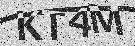

In [5]:
from PIL import Image
image = Image.open('captua.jpg')
image

In [15]:
import PIL
import numpy as np

pil_image = PIL.Image.open('kaptcha.jpg').convert('RGB')
open_cv_image = np.array(pil_image)

In [16]:
# open_cv_image

Populating the interactive namespace from numpy and matplotlib


c:\users\leo\jupyter\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'f', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


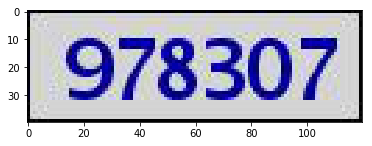

In [17]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [18]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [20]:
array = []
for (c, _) in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print((x,y,w,h))
    if h == 24:
        array.append((x,y,w,h))

(1, 1, 118, 38)
(13, 9, 19, 24)
(18, 13, 9, 8)
(32, 9, 15, 24)
(46, 9, 16, 24)
(51, 22, 6, 7)
(52, 13, 4, 5)
(63, 9, 16, 24)
(78, 9, 18, 24)
(83, 13, 8, 16)
(97, 9, 15, 24)


In [21]:
array

[(13, 9, 19, 24),
 (32, 9, 15, 24),
 (46, 9, 16, 24),
 (63, 9, 16, 24),
 (78, 9, 18, 24),
 (97, 9, 15, 24)]

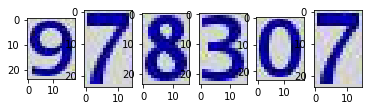

In [22]:
from matplotlib import pyplot as plt
figure = plt.figure()

for id, (x, y, w, h) in enumerate(array):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = figure.add_subplot(1, len(array), id+1)
    plt.imshow(thresh)

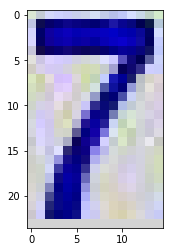

In [23]:
from matplotlib import pyplot as plt
import random

figure = plt.figure()

for id, (x, y, w, h) in enumerate(array):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig('{}.jpg'.format(random.randint(100000,45465464654654)), dpi=100)